<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final Project Submission</a></span><ul class="toc-item"><li><span><a href="#Introduction:" data-toc-modified-id="Introduction:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction:</a></span></li></ul></li><li><span><a href="#Initial-Data-Exploration" data-toc-modified-id="Initial-Data-Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Import-relevant-features" data-toc-modified-id="Import-relevant-features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import relevant features</a></span></li><li><span><a href="#Load-up-the-data" data-toc-modified-id="Load-up-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load up the data</a></span></li><li><span><a href="#Initial-Data-Exploration" data-toc-modified-id="Initial-Data-Exploration-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Initial Data Exploration</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Dropping-columns" data-toc-modified-id="Dropping-columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dropping columns</a></span></li><li><span><a href="#Fixing-null-values" data-toc-modified-id="Fixing-null-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fixing null values</a></span></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#3-Central-Questions" data-toc-modified-id="3-Central-Questions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>3 Central Questions</a></span><ul class="toc-item"><li><span><a href="#What-are-the-most-salient-features-of-a-house-that-can-be-changed-in-order-to-impact-sale-price?" data-toc-modified-id="What-are-the-most-salient-features-of-a-house-that-can-be-changed-in-order-to-impact-sale-price?-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>What are the most salient features of a house that can be changed in order to impact sale price?</a></span></li><li><span><a href="#Which-immutable-features-of-the-house-(location,-year-built)-will-most-drastically-impact-sale-price?" data-toc-modified-id="Which-immutable-features-of-the-house-(location,-year-built)-will-most-drastically-impact-sale-price?-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Which immutable features of the house (location, year built) will most drastically impact sale price?</a></span></li><li><span><a href="#Will-investment-in-the-aspects-of-the-house-that-are-changible-be-cost-effective?" data-toc-modified-id="Will-investment-in-the-aspects-of-the-house-that-are-changible-be-cost-effective?-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Will investment in the aspects of the house that are changible be cost effective?</a></span></li></ul></li><li><span><a href="#Normalizing-Data" data-toc-modified-id="Normalizing-Data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Normalizing Data</a></span></li><li><span><a href="#Visualizing-Data" data-toc-modified-id="Visualizing-Data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Visualizing Data</a></span><ul class="toc-item"><li><span><a href="#Histogram" data-toc-modified-id="Histogram-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Histogram</a></span></li><li><span><a href="#Removing-Outliers" data-toc-modified-id="Removing-Outliers-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Removing Outliers</a></span></li><li><span><a href="#Jointplot---Checking-for-linearity" data-toc-modified-id="Jointplot---Checking-for-linearity-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Jointplot - Checking for linearity</a></span></li><li><span><a href="#One-hot-Encoding-Categorical-Variables" data-toc-modified-id="One-hot-Encoding-Categorical-Variables-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>One-hot Encoding Categorical Variables</a></span></li><li><span><a href="#Log-Tranformation" data-toc-modified-id="Log-Tranformation-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Log Tranformation</a></span></li></ul></li></ul></li><li><span><a href="#Fitting-the-model" data-toc-modified-id="Fitting-the-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fitting the model</a></span><ul class="toc-item"><li><span><a href="#Making-a-hypothesis" data-toc-modified-id="Making-a-hypothesis-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Making a hypothesis</a></span><ul class="toc-item"><li><span><a href="#Hypothesis" data-toc-modified-id="Hypothesis-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Hypothesis</a></span></li></ul></li><li><span><a href="#Train/Test-Split" data-toc-modified-id="Train/Test-Split-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Train/Test Split</a></span></li><li><span><a href="#Fitting-the-model-to-the-train-data" data-toc-modified-id="Fitting-the-model-to-the-train-data-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Fitting the model to the train data</a></span></li><li><span><a href="#Removing-non-influencial-features" data-toc-modified-id="Removing-non-influencial-features-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Removing non-influencial features</a></span></li><li><span><a href="#Checking-for-Multicollinearity" data-toc-modified-id="Checking-for-Multicollinearity-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Checking for Multicollinearity</a></span><ul class="toc-item"><li><span><a href="#Using-variance-inflation-factor-to-remove-multicollinear-features." data-toc-modified-id="Using-variance-inflation-factor-to-remove-multicollinear-features.-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Using variance inflation factor to remove multicollinear features.</a></span></li><li><span><a href="#Another-check-to-remove-high-p-scores" data-toc-modified-id="Another-check-to-remove-high-p-scores-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Another check to remove high p scores</a></span></li></ul></li><li><span><a href="#Normality-Check" data-toc-modified-id="Normality-Check-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Normality Check</a></span></li><li><span><a href="#Homoscedasticity-Check" data-toc-modified-id="Homoscedasticity-Check-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Homoscedasticity Check</a></span></li><li><span><a href="#Cross-Validation-(ish)" data-toc-modified-id="Cross-Validation-(ish)-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Cross-Validation (ish)</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#What-are-the-most-salient-features-of-a-house-that-can-be-changed-in-order-to-impact-sale-price?" data-toc-modified-id="What-are-the-most-salient-features-of-a-house-that-can-be-changed-in-order-to-impact-sale-price?-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>What are the most salient features of a house that can be changed in order to impact sale price?</a></span></li><li><span><a href="#Which-immutable-features-of-the-house-(location,-year-built)-will-most-drastically-impact-sale-price?" data-toc-modified-id="Which-immutable-features-of-the-house-(location,-year-built)-will-most-drastically-impact-sale-price?-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Which immutable features of the house (location, year built) will most drastically impact sale price?</a></span></li><li><span><a href="#Will-investment-in-the-aspects-of-the-house-that-are-changible-be-cost-effective?" data-toc-modified-id="Will-investment-in-the-aspects-of-the-house-that-are-changible-be-cost-effective?-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Will investment in the aspects of the house that are changible be cost effective?</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Future-Steps" data-toc-modified-id="Future-Steps-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Future Steps</a></span></li></ul></div>

# Final Project Submission

Please fill out:
* Student name: Stephen Turk 
* Student pace: part time
* Scheduled project review date/time: 8/20/20 at 400 MST/ 600EST
* Instructor name: James Irving
* Blog post URL:


In [1]:
# from IPython.display import display,Markdown
# with open("README.md") as file:
#     display(Markdown(file.read()))
    

## Introduction:

For this project we will be using the King's County Home data set to create a linear regression model that accurately (r2 higher than .65) predicts home prices. Our stakeholders for this project are homeowners looking to sell their home and wanting to know what steps to take to change increase their home sale price.

Before we know all the best questions to ask on behalf of our shareholders we will first do some exploration of the data set as well as making it more easily used for linear regression.

# Initial Data Exploration

## Import relevant features

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-muted')
sns.set_style('ticks')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Load up the data

In [3]:
data = pd.read_csv('kc_house_data.csv')

## Initial Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

With all the orginal columns in checking for correllation, primarily with the price column.

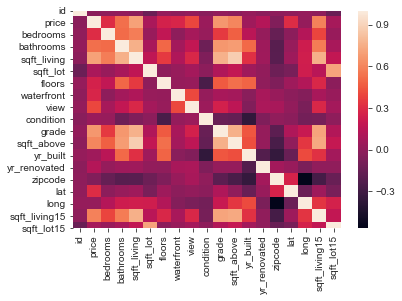

In [6]:
corr = data.corr()

sns.heatmap(corr)
plt.show()


In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Cleaning

## Dropping columns 

Droping columns that showed little correllation and from the column descriptions only seemed moderately useful. Date sold might be useful in terms of sesason or important to adjust for if the time period in the data was a bit longer.

In [8]:
data = data.drop([ 'id', 'view', 'date'], axis = 1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.0+ MB


## Fixing null values

 Waterfront needs some data added, but because this data seems categorical (either waterfront or not) I will assume that any missing data most likely was houses that were not on the waterfront.

In [10]:
data['waterfront'].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [11]:
data['waterfront'] = data['waterfront'].fillna(0)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.0+ MB


Similarly, SqFt Basement needs to be cast as a float and I will assume a lack of data suggests no basement square-footage.

In [13]:
data['sqft_basement'].head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object

In [14]:
data.sqft_basement = data.sqft_basement.map(lambda x: float(x.replace('?', '0')))

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10)
memory usage: 3.0 MB


Checking for null values

In [16]:
data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Only need to check into yr_renovated

In [17]:
data['yr_renovated'].head(15)

0        0.0
1     1991.0
2        NaN
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       NaN
13       0.0
14       0.0
Name: yr_renovated, dtype: float64

First I will assume all data that is NaN (not a number) is actually a zero, indicating no renovation had taken place.

In [18]:
data['yr_renovated'] = data['yr_renovated'].fillna(0)

In [19]:
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
data['yr_renovated'].describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

Now I will cast the column as a boolean in order to give a renovated or not column instead of a date renovated. A house renovated in 2015 is not two-thousand "more renovated" than a house that has not been renovated. I'll then cast the column back to integer, but having replaced independent dates with simply a 1 for renovated and a 0 for not renovated. 

In [21]:
data['yr_renovated'] = data['yr_renovated'].astype(bool)

In [22]:
data['yr_renovated'] = data['yr_renovated'].astype(int)

In [23]:
#quick column name change since it is not year renovated any more.
data.rename(columns={'yr_renovated': 'renovated'}, inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
renovated        21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11)
memory usage: 3.0 MB


Now, just checking to see how our data looks, befor calling it clean and moving on to the next step.

In [25]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,1788.596842,285.716581,1970.999676,0.034449,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,827.759761,439.819830,29.375234,0.182384,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,1.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
renovated        21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11)
memory usage: 3.0 MB


Great! We've got no missing values and allour data is in numerical format ready to be used for linear regression.

# Data Exploration

Now that data is in a more digestible it is time to bring in the target stakeholders and begin exploring the data with them in mind.

## 3 Central Questions

###  What are the most salient features of a house that can be changed in order to impact sale price?
###  Which immutable features of the house (location, year built) will most drastically impact sale price?
###  Will investment in the aspects of the house that are changible be cost effective?

Quick look over all columns

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
renovated        21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11)
memory usage: 3.0 MB


## Normalizing Data

Normalizing data can help to compare accross columns, but is less helpful for showing results to stakeholders. Let's make a copy dataframe for visuals for stakeholders later on.

In [28]:
data_not_normal = data.copy(deep=True)

Normalizing data will not impact how influencial each feature is, but it will enable us to talk about the relative effect each feature has while comparing apples to apples.

In [29]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']:
    data[feat] = norm_feat(data[feat])
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,21597.000000,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04
mean,5.402966e+05,-2.303005e-16,1.158082e-16,-1.421283e-16,1.579203e-17,-1.473923e-16,-9.212019e-18,1.105442e-16,3.948008e-16,3.158406e-17,-2.895206e-17,2.674117e-15,-3.421607e-17,98077.951845,-1.768913e-14,-9.058046e-15,1.368643e-16,1.842404e-17
std,3.673681e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,53.513072,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,7.800000e+04,-2.562024e+00,-2.101247e+00,-1.862880e+00,-3.520522e-01,-9.155311e-01,-8.249784e-02,-3.704314e+00,-3.970267e+00,-1.713778e+00,-6.496219e-01,-2.416991e+00,-1.888827e-01,98001.000000,-2.917271e+00,-2.167495e+00,-2.316914e+00,-4.439058e-01
25%,3.220000e+05,-4.028937e-01,-4.757266e-01,-7.083297e-01,-2.429067e-01,-9.155311e-01,-8.249784e-02,-6.299719e-01,-5.607873e-01,-7.231529e-01,-6.496219e-01,-6.808346e-01,-1.888827e-01,98033.000000,-6.423086e-01,-8.102234e-01,-7.247493e-01,-2.807861e-01
50%,4.500000e+05,-4.028937e-01,1.744818e-01,-1.855143e-01,-1.806552e-01,1.093901e-02,-8.249784e-02,-6.299719e-01,-5.607873e-01,-2.761633e-01,-6.496219e-01,1.361802e-01,-1.888827e-01,98065.000000,8.449553e-02,-1.209286e-01,-2.139723e-01,-1.883919e-01
75%,6.450000e+05,6.766715e-01,4.995859e-01,5.115728e-01,-1.065957e-01,9.374092e-01,-8.249784e-02,9.071993e-01,2.915825e-01,5.090887e-01,6.008902e-01,8.851104e-01,-1.888827e-01,98118.000000,8.509960e-01,6.323214e-01,5.448965e-01,-9.808756e-02
max,7.700000e+06,3.198406e+01,7.651878e+00,1.248187e+01,3.951112e+01,3.716820e+00,1.212097e+01,2.444371e+00,4.553432e+00,9.207265e+00,1.030941e+01,1.497871e+00,5.294046e+00,98199.000000,1.569861e+00,6.388288e+00,6.163444e+00,3.147422e+01


## Visualizing Data

### Histogram

A histogram gives us a quick and dirty look at each column to see how it is distributed. Waterfront and now Renovated are both basically boolean values. A home is either renovated or not, waterfront or not.

Condition, Floors, Grade and Zipcode are likely all categorical variables (Zipcode doesn't look like it, but we already know that zipcode numbers do not reference a specific numerical value).

The historgram also gives us an idea of columns that likely have major outliers. bedrooms, price, sqft_above, sqft_basement, sqft_living, sqft_lot and sqft_lot15 are all very skewed graphs.

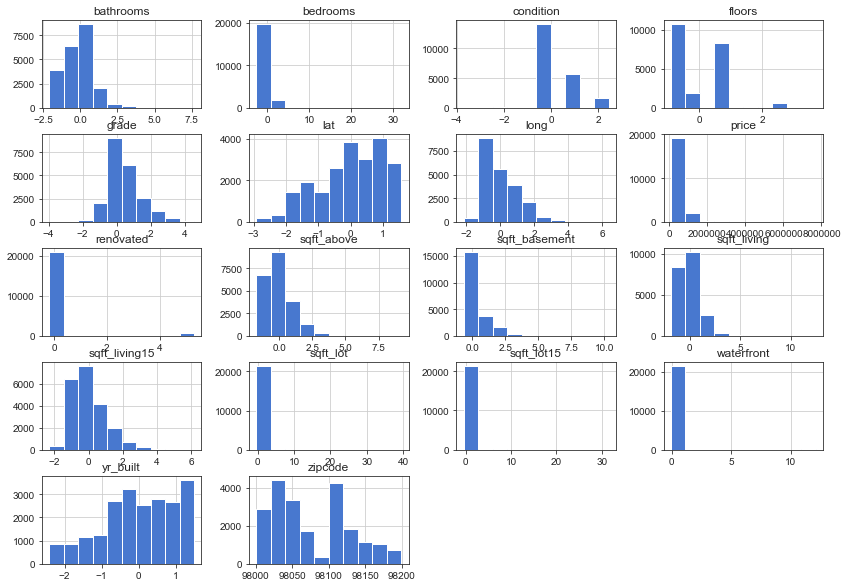

In [30]:
data.hist(figsize = (14,10))
plt.show()

### Removing Outliers

Let's take a more detailed look at all the different categories when plotted against our target variable, price.

In [31]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, data.price.quantile(q=q)))

0.8 percentile: 700435.9999999998
0.81 percentile: 718000.0
0.82 percentile: 730000.72
0.83 percentile: 749950.0
0.84 percentile: 760003.2
0.85 percentile: 779721.9999999991
0.86 percentile: 799000.0
0.87 percentile: 815000.0
0.88 percentile: 836739.9999999998
0.89 percentile: 859967.6
0.9 percentile: 887000.0
0.91 percentile: 919993.6
0.92 percentile: 950000.0
0.93 percentile: 997964.0000000002
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


Now we know that the upper 1% of prices are houses over $1,970,000. We will remove these high priced outliers and see if this improves our distribution.

In [32]:
orig_tot = len(data)
data = data[data.price < 1970000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(data))/orig_tot)

Percent removed: 0.010047691809047552


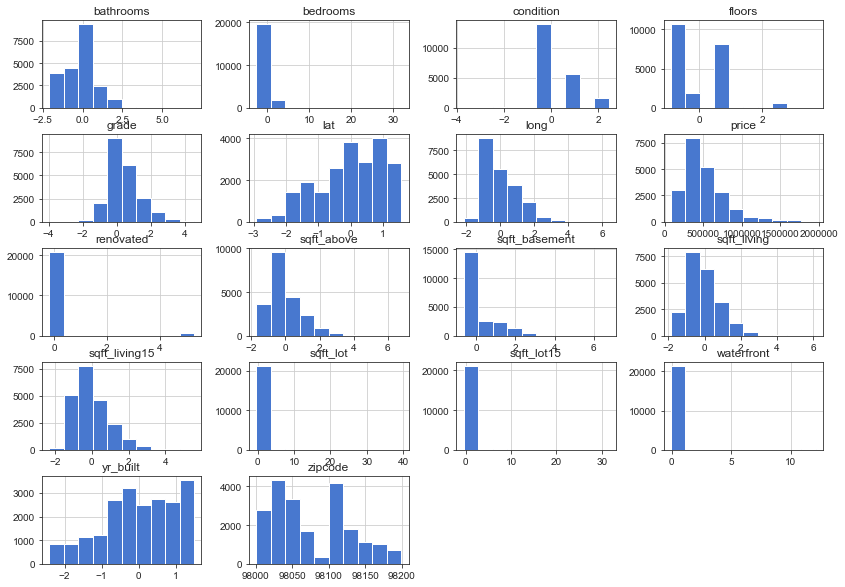

In [33]:
data.hist(figsize = (14,10))
plt.show()

Now our histograms are looking much more normal, though not totally normal yet.

### Jointplot - Checking for linearity

Let's take a more detailed look at all the different categories when plotted against our target variable, price.

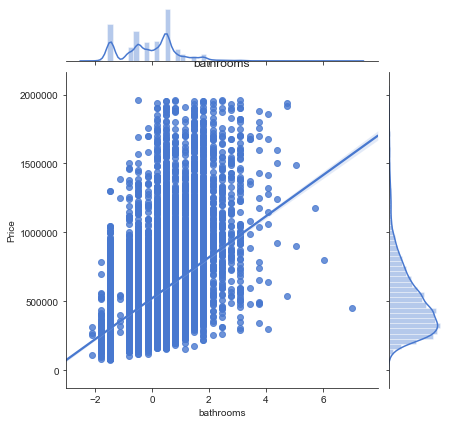

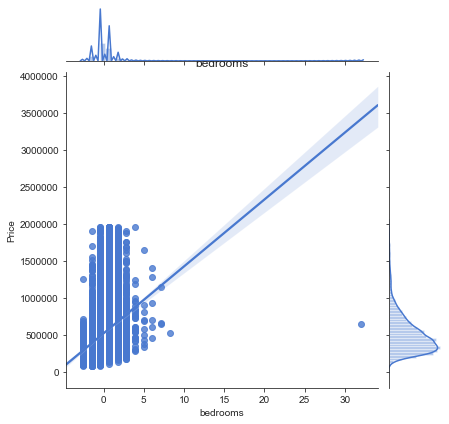

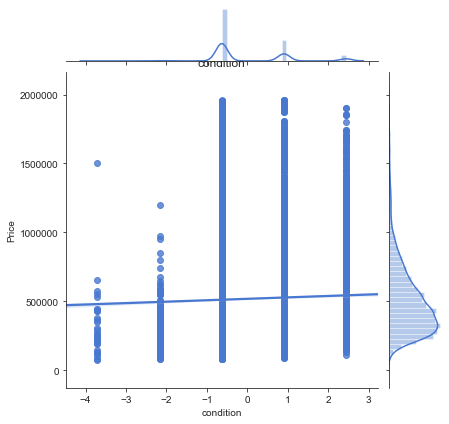

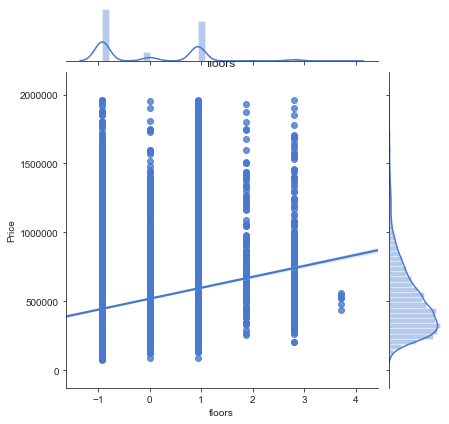

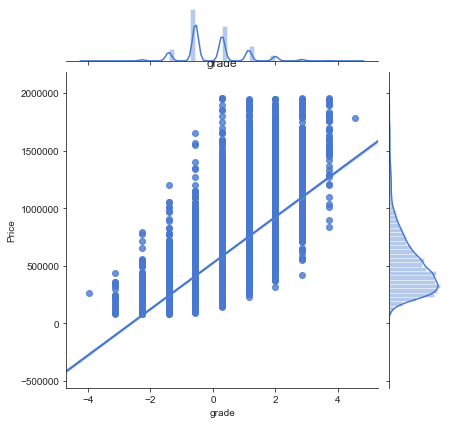

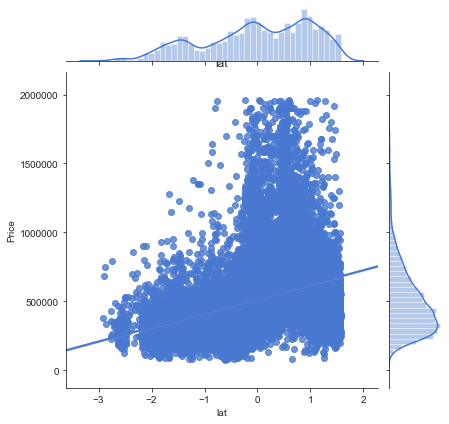

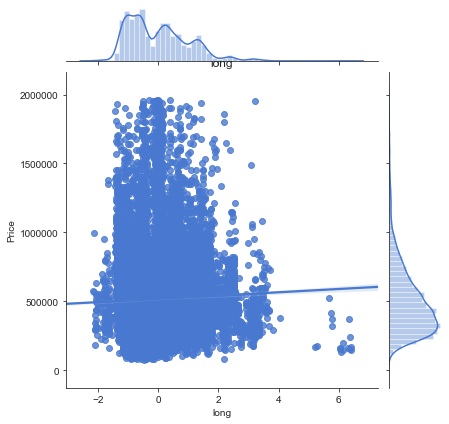

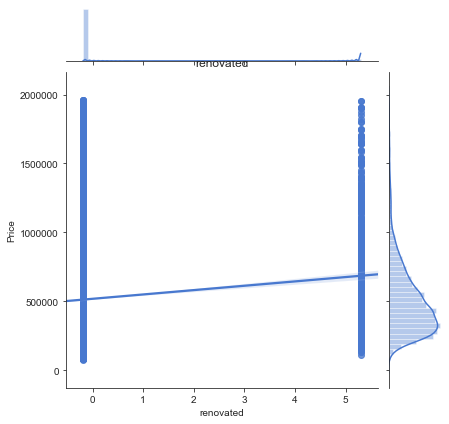

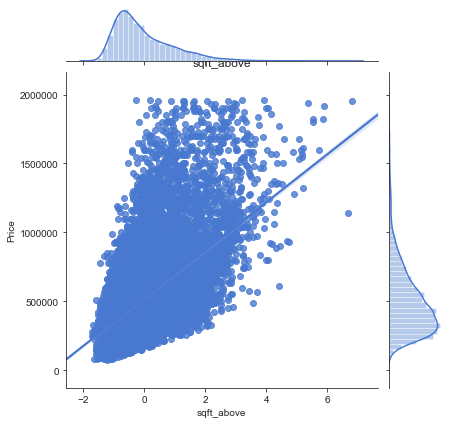

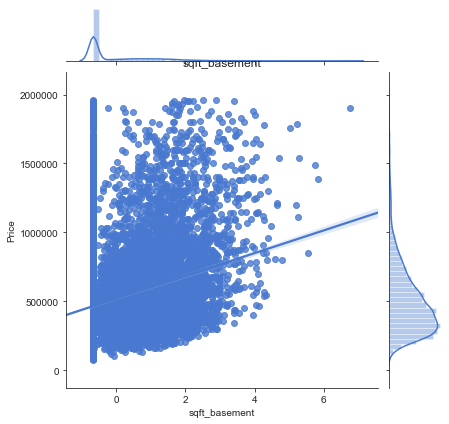

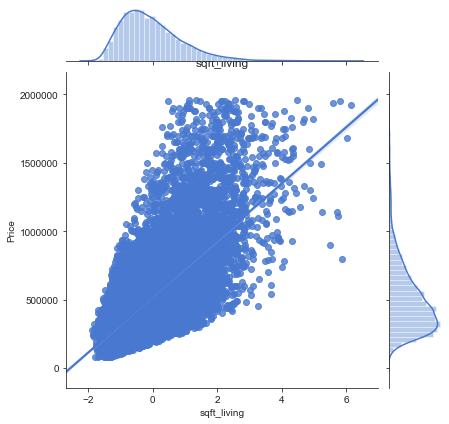

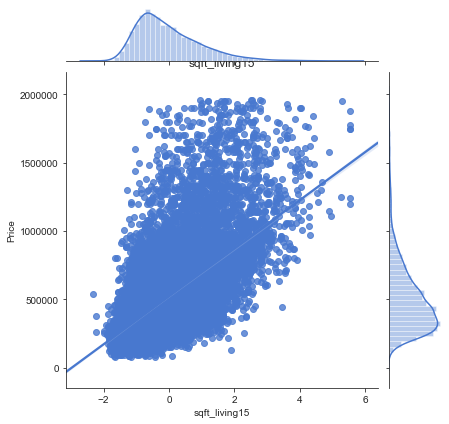

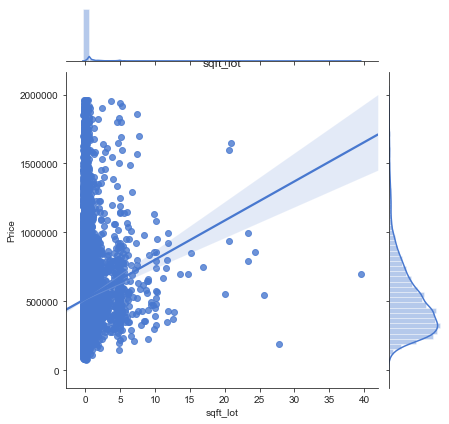

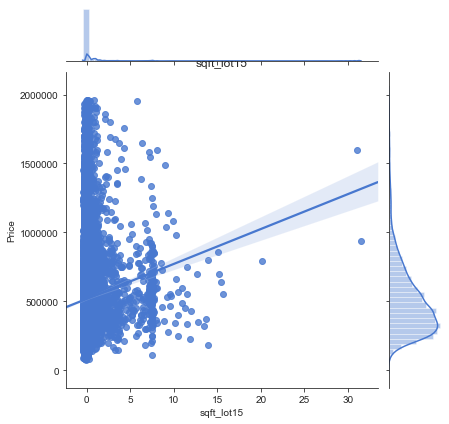

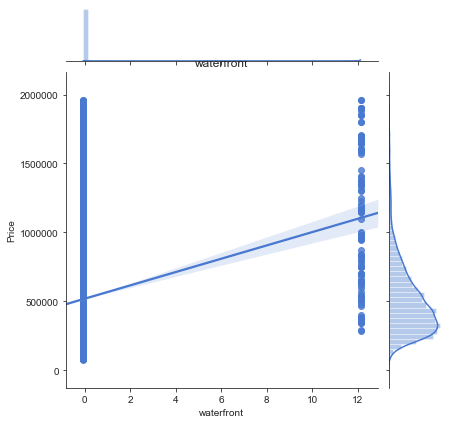

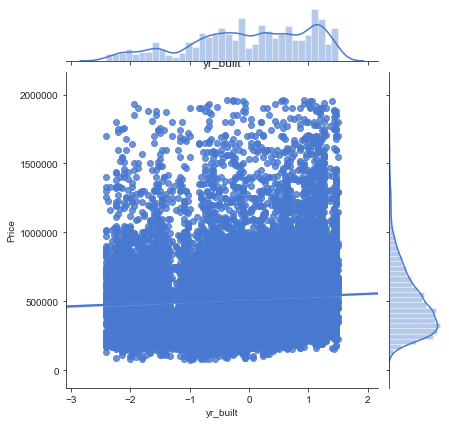

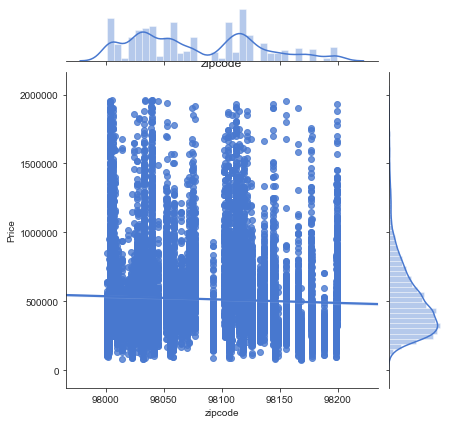

In [34]:
relcols = ['bathrooms', 'bedrooms','condition', 'floors', 'grade', 'lat', 'long', 'renovated', 'sqft_above', 
           'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'waterfront', 'yr_built', 'zipcode']

for col in relcols:
    sns.jointplot(x = col, y = 'price', data = data, kind = 'reg')
    plt.ylabel('Price')
    plt.title(col)
    plt.show()

These jointplots give us an idea of the distribution of data and provide us with some nice visuals we can use later to show individual features to stakeholders.

### One-hot Encoding Categorical Variables

Looking for catagorical variables to one-hot encode:

While we stated above that condition, floors, and grade were all likely categorical after looking them further it seems more likely that these features are still numeric and not necessary to change. This leaves zipcode as our diffinitively categorical variable.

Taking categorical variables and changing them to category type before one-hot encoding.

In [35]:
cat_feats = ['zipcode']
cat_feats_df = data[cat_feats]
cat_feats_df = cat_feats_df.astype('category')
cat_feats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21380 entries, 0 to 21596
Data columns (total 1 columns):
zipcode    21380 non-null category
dtypes: category(1)
memory usage: 191.0 KB


Now creating dummy variables and dropping the first column to ensure no dummy variable trap.

In [36]:
cat_feats_df = pd.get_dummies(cat_feats_df, drop_first=True)
cat_feats_df.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now removing the original zipcode column and adding the newly created columns to the original dataframe.

In [37]:
data = data.drop(['zipcode'], axis=1)
data= pd.concat([data, cat_feats_df], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,-0.402894,-1.451039,-0.980629,-0.228177,-0.915531,-0.082498,-0.629972,-0.560787,-0.735234,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,-0.402894,0.174482,0.533357,-0.189735,0.937409,-0.082498,-0.629972,-0.560787,0.460766,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,-1.482459,-1.451039,-1.427201,-0.123137,-0.915531,-0.082498,-0.629972,-1.413157,-1.230546,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.676671,1.149794,-0.131054,-0.243873,-0.915531,-0.082498,2.444371,-0.560787,-0.892284,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.402894,-0.150622,-0.436030,-0.169499,-0.915531,-0.082498,-0.629972,0.291583,-0.131194,...,0,0,0,0,0,0,0,0,0,0


### Log Tranformation

Our data still has some outliers on price and linearity seems to be less reliable as prices increase. A log tranformation will help bring the data more in line with normal.

In [38]:
data.price = data.price.map(np.log) #log transform price...

# Fitting the model

## Making a hypothesis

Before we get a model we should have an idea what we are expecting to see as well as a null hypothesis that we are hoping to reject.

In our case, our expectation is that changes in the values of our columns will correllate to changes in our housing prices. 

In order to be more exact in our hypotheis we will choose a stardard value for 𝛼, .05. Meaning that we will only reject the null hypothesis if there is less than a 5% chance our observed changes came from random chance.

Therefore our null hypothesis would be that changes in our features do not effect price.

### Hypothesis

𝐻1: Predicted data ≠ μ (mean)

𝐻0: Predicted data = μ (mean)

## Train/Test Split

Now ready to remove the outcome (price) and train the model by splitting out train/test data points.

In [39]:
outcome = 'price'
x_cols = list(data.columns)
x_cols.remove(outcome)

In [40]:
train, test = train_test_split(data)

In [41]:
print(len(train), len(test))
train.head()

16035 5345


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
7517,13.269058,0.676671,-0.800831,0.435329,-0.219725,-0.915531,-0.082498,-0.629972,0.291583,-0.324486,...,0,0,0,0,0,0,0,0,0,0
15230,13.411295,-0.402894,-0.150622,-0.218190,-0.272849,-0.915531,-0.082498,2.444371,-0.560787,-0.916446,...,0,0,0,0,0,0,0,0,0,0
13891,12.487485,-1.482459,-0.150622,-0.239974,-0.102467,-0.915531,-0.082498,-0.629972,0.291583,-0.638587,...,0,0,0,0,0,0,1,0,0,0
8353,12.777052,-0.402894,-1.451039,-1.035089,-0.092953,-0.915531,-0.082498,-0.629972,-0.560787,-0.795638,...,0,0,0,0,0,0,0,0,0,0
18888,12.983101,-2.562024,-1.451039,-1.536121,-0.321144,-0.915531,-0.082498,2.444371,-1.413157,-1.351354,...,0,0,0,0,0,0,0,0,0,0


## Fitting the model to the train data

In [42]:
predictors = '+'.join(x_cols)
#predictors = predictors.replace('zipcode', 'C(zipcode)')
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
print(formula)
model.summary()

price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+sqft_above+sqft_basement+yr_built+renovated+lat+long+sqft_living15+sqft_lot15+zipcode_98002+zipcode_98003+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98126+zipcode_98133+zipcode_98136+zipcode_98144+zipcode_98146+zi

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1170.
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:30:25   Log-Likelihood:                 4311.5
No. Observations:               16035   AIC:                            -8451.
Df Residuals:                   15949   BIC:                            -7790.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.7039      0.025    515.243      0.000      12.656      12.752
bedrooms          0.0017      0.002      0.907      0.365      -0.002       0.005
bathrooms         0.0293      0.003     10.646      0.000       0.024       0.035
sqft_living       0.1160      0.018      6.560      0.000       0.081       0.151
sqft_lot          0.0281      0.002     13.339      0.000       0.024       0.032
floors           -0.0145      0.002     -6.324      0.000      -0.019      -0.010
waterfront        0.0534      0.002     28.345      0.000       0.050       0.057
condition         0.0363      0.002     21.776      0.000       0.033       0.040
grade             0.1120      0.003     38.993      0.000       0.106       0.118
sqft_above        0.0623      0.016      3.897      0.000       0.031       0.094
sqft_basement     0.0100      0.008      1.194      0.233      -0.006       0.026
yr_built         -0.0152      0.003     -6.026      0.000      -0.020      -0.010
renovated         0.0143      0.002      8.979      0.000       0.011       0.017
lat               0.0751      0.012      6.398      0.000       0.052       0.098
long             -0.0543      0.008     -6.433      0.000      -0.071      -0.038
sqft_living15     0.0663      0.003     24.844      0.000       0.061       0.072
sqft_lot15        0.0027      0.002      1.261      0.208      -0.002       0.007
zipcode_98002    -0.0110      0.020     -0.550      0.582      -0.050       0.028
zipcode_98003     0.0018      0.017      0.106      0.915      -0.032       0.036
zipcode_98004     0.9265      0.032     29.202      0.000       0.864       0.989
zipcode_98005     0.5846      0.034     17.306      0.000       0.518       0.651
zipcode_98006     0.5170      0.028     18.744      0.000       0.463       0.571
zipcode_98007     0.5211      0.035     14.808      0.000       0.452       0.590
zipcode_98008     0.5383      0.033     16.214      0.000       0.473       0.603
zipcode_98010     0.3430      0.029     11.800      0.000       0.286       0.400
zipcode_98011     0.2131      0.043      4.991      0.000       0.129       0.297
zipcode_98014     0.2649      0.047      5.672      0.000       0.173       0.356
zipcode_98019     0.2024      0.047      4.351      0.000       0.111       0.294
zipcode_98022     0.2203      0.025      8.666      0.000       0.171       0.270
zipcode_98023    -0.0754      0.016     -4.743      0.000      -0.107      -0.044
zipcode_98024     0.4067      0.041      9.888      0.000       0.326       0.487
zipcode_98027     0.4525      0.028     16.118      0.000       0.397       0.508
zipcode_98028     0.1760      0.042      4.233      0.000       0.095       0.257
zipcode_98029     0.5561      0.032     17.329      0.000       0.493       0.619
zipcode_98030     0.0461      0.019      2.412   

Whew! We have our first model and our R2 is pretty strong at .86. However, we have many columns that are not meeting our target 𝛼 of .05. We therefore can't be confident that these predictors are not simply a result of random chance.

## Removing non-influencial features

Our R2 score is not too bad, but we have lots of columns and many have far too high of a P score.

Let's remove any column that has a p score over .05. In other words any column that is unlikely to be cotributing to our final predictions.

In [43]:
#created function to check model for high P values and remove any over .05
def remove_bad_feat(model):
    """Remove columns with P value over .05"""
    summary = model.summary()
    p_table = summary.tables[1]
    p_table = pd.DataFrame(p_table.data)
    p_table.columns = p_table.iloc[0]
    p_table = p_table.drop(0)
    p_table = p_table.set_index(p_table.columns[0])
    p_table['P>|t|'] = p_table['P>|t|'].astype(float)
    x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
    x_cols.remove('Intercept')
    print(len(p_table), len(x_cols))
    return x_cols



In [44]:
x_cols = remove_bad_feat(model)
x_cols

86 77


['bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'renovated',
 'lat',
 'long',
 'sqft_living15',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 '

We have removed all columns with P value over .05. Let's see if our model remains predictive with these columns removed.

In [45]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
print(formula)
model.summary()

price~bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+sqft_above+yr_built+renovated+lat+long+sqft_living15+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98126+zipcode_98133+zipcode_98136+zipcode_98144+zipcode_98146+zipcode_98155+zipcode_98166+zipcode_98168+zipcode_98177+zipcode_

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1292.
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:37:53   Log-Likelihood:                 4308.1
No. Observations:               16035   AIC:                            -8460.
Df Residuals:                   15957   BIC:                            -7861.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.7220      0.017    758.912      0.000      12.689      12.755
bathrooms         0.0296      0.003     10.972      0.000       0.024       0.035
sqft_living       0.1377      0.004     32.127      0.000       0.129       0.146
sqft_lot          0.0297      0.002     18.197      0.000       0.026       0.033
floors           -0.0146      0.002     -6.356      0.000      -0.019      -0.010
waterfront        0.0534      0.002     28.396      0.000       0.050       0.057
condition         0.0363      0.002     21.775      0.000       0.033       0.040
grade             0.1117      0.003     39.223      0.000       0.106       0.117
sqft_above        0.0438      0.004     10.766      0.000       0.036       0.052
yr_built         -0.0155      0.003     -6.181      0.000      -0.020      -0.011
renovated         0.0143      0.002      8.956      0.000       0.011       0.017
lat               0.0839      0.010      8.798      0.000       0.065       0.103
long             -0.0565      0.008     -7.041      0.000      -0.072      -0.041
sqft_living15     0.0664      0.003     24.981      0.000       0.061       0.072
zipcode_98004     0.9052      0.024     37.382      0.000       0.858       0.953
zipcode_98005     0.5643      0.027     20.827      0.000       0.511       0.617
zipcode_98006     0.5000      0.021     23.737      0.000       0.459       0.541
zipcode_98007     0.5014      0.029     17.410      0.000       0.445       0.558
zipcode_98008     0.5189      0.026     19.768      0.000       0.467       0.570
zipcode_98010     0.3442      0.027     12.666      0.000       0.291       0.398
zipcode_98011     0.1827      0.033      5.499      0.000       0.118       0.248
zipcode_98014     0.2484      0.041      6.103      0.000       0.169       0.328
zipcode_98019     0.1786      0.039      4.604      0.000       0.103       0.255
zipcode_98022     0.2298      0.023      9.792      0.000       0.184       0.276
zipcode_98023    -0.0798      0.013     -6.326      0.000      -0.104      -0.055
zipcode_98024     0.3961      0.037     10.704      0.000       0.324       0.469
zipcode_98027     0.4401      0.023     19.183      0.000       0.395       0.485
zipcode_98028     0.1445      0.032      4.572      0.000       0.083       0.206
zipcode_98029     0.5410      0.027     20.276      0.000       0.489       0.593
zipcode_98030     0.0406      0.016      2.558      0.011       0.009       0.072
zipcode_98031     0.0350      0.017      2.119      0.034       0.003       0.067
zipcode_98032    -0.0803      0.020     -4.009      0.000      -0.120      -0.041
zipcode_98033     0.5716      0.027     21.108      0.000       0.518       0.625
zipcode_98034     0.3036      0.029     10.560      0.000       0.247       0.360
zipcode_98038     0.2149      0.018     11.740   

Great! Our R2 remains unchanged and this time we have no P values over .05 so another round of feature selection is unnecessary.

In [46]:
x_cols = remove_bad_feat(model)
x_cols

78 76


['bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'renovated',
 'lat',
 'long',
 'sqft_living15',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 '

In [47]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
print(formula)
model.summary()

price~bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+sqft_above+yr_built+renovated+lat+long+sqft_living15+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98126+zipcode_98133+zipcode_98136+zipcode_98144+zipcode_98146+zipcode_98155+zipcode_98166+zipcode_98168+zipcode_98177+zipcode_

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1308.
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:43:00   Log-Likelihood:                 4306.4
No. Observations:               16035   AIC:                            -8459.
Df Residuals:                   15958   BIC:                            -7867.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.7431      0.012   1029.478      0.000      12.719      12.767
bathrooms         0.0296      0.003     10.965      0.000       0.024       0.035
sqft_living       0.1380      0.004     32.211      0.000       0.130       0.146
sqft_lot          0.0297      0.002     18.183      0.000       0.026       0.033
floors           -0.0144      0.002     -6.278      0.000      -0.019      -0.010
waterfront        0.0535      0.002     28.528      0.000       0.050       0.057
condition         0.0362      0.002     21.750      0.000       0.033       0.039
grade             0.1117      0.003     39.206      0.000       0.106       0.117
sqft_above        0.0435      0.004     10.693      0.000       0.035       0.051
yr_built         -0.0158      0.003     -6.282      0.000      -0.021      -0.011
renovated         0.0143      0.002      8.924      0.000       0.011       0.017
lat               0.0943      0.008     12.190      0.000       0.079       0.109
long             -0.0535      0.008     -6.806      0.000      -0.069      -0.038
sqft_living15     0.0664      0.003     24.987      0.000       0.061       0.072
zipcode_98004     0.8798      0.020     43.990      0.000       0.841       0.919
zipcode_98005     0.5385      0.023     23.125      0.000       0.493       0.584
zipcode_98006     0.4777      0.017     27.585      0.000       0.444       0.512
zipcode_98007     0.4750      0.025     18.959      0.000       0.426       0.524
zipcode_98008     0.4917      0.022     22.555      0.000       0.449       0.534
zipcode_98010     0.3358      0.027     12.530      0.000       0.283       0.388
zipcode_98011     0.1470      0.027      5.422      0.000       0.094       0.200
zipcode_98014     0.2115      0.036      5.953      0.000       0.142       0.281
zipcode_98019     0.1389      0.032      4.289      0.000       0.075       0.202
zipcode_98022     0.2303      0.023      9.817      0.000       0.184       0.276
zipcode_98023    -0.0786      0.013     -6.243      0.000      -0.103      -0.054
zipcode_98024     0.3689      0.034     10.852      0.000       0.302       0.436
zipcode_98027     0.4184      0.020     21.173      0.000       0.380       0.457
zipcode_98028     0.1097      0.025      4.309      0.000       0.060       0.160
zipcode_98029     0.5158      0.023     22.464      0.000       0.471       0.561
zipcode_98030     0.0335      0.015      2.174      0.030       0.003       0.064
zipcode_98031     0.0254      0.016      1.617      0.106      -0.005       0.056
zipcode_98032    -0.0859      0.020     -4.336      0.000      -0.125      -0.047
zipcode_98033     0.5411      0.022     25.111      0.000       0.499       0.583
zipcode_98034     0.2705      0.023     11.983      0.000       0.226       0.315
zipcode_98038     0.2043      0.017     11.744   

After 2 rounds (only one was necessary) of removing non-influential columns lets got on to check for multicollinearity.

## Checking for Multicollinearity

### Using variance inflation factor to remove multicollinear features.

Finding out each columns VIF score.

In [48]:
X = data[x_cols]
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


[('bathrooms', 72.22736431804609),
 ('sqft_living', 3.1590797881098505),
 ('sqft_lot', 7.485483446956825),
 ('floors', 1.2202664429637327),
 ('waterfront', 2.454520497551634),
 ('condition', 1.0588884685039326),
 ('grade', 1.3016392821889453),
 ('sqft_above', 3.5412243984418885),
 ('yr_built', 7.019548501494943),
 ('renovated', 2.942794687826495),
 ('lat', 1.1292687667100076),
 ('long', 28.118048517363594),
 ('sqft_living15', 29.635096379250953),
 ('zipcode_98004', 3.1415641566017016),
 ('zipcode_98005', 2.412968432261917),
 ('zipcode_98006', 1.9359891800651885),
 ('zipcode_98007', 3.1233219599784063),
 ('zipcode_98008', 1.830980506409072),
 ('zipcode_98010', 2.7932190559937435),
 ('zipcode_98011', 1.6008121369810844),
 ('zipcode_98014', 3.1530115399664815),
 ('zipcode_98019', 3.4748151481095286),
 ('zipcode_98022', 4.287852050624121),
 ('zipcode_98023', 2.7742891322761247),
 ('zipcode_98024', 1.6940257336741558),
 ('zipcode_98027', 2.034004314202292),
 ('zipcode_98028', 3.475648814300

Remove VIF scores higher than 5

In [49]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

76 61


Refitting the model

In [50]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
print(formula)
model.summary()

price~sqft_living+floors+waterfront+condition+grade+sqft_above+renovated+lat+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98117+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98126+zipcode_98133+zipcode_98144+zipcode_98146+zipcode_98155+zipcode_98168+zipcode_98177+zipcode_98199


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1308.
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:43:43   Log-Likelihood:                 2804.2
No. Observations:               16035   AIC:                            -5484.
Df Residuals:                   15973   BIC:                            -5008.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.0578      0.004   3541.236      0.000      13.051      13.065
sqft_living       0.1926      0.004     48.895      0.000       0.185       0.200
floors           -0.0092      0.002     -4.220      0.000      -0.013      -0.005
waterfront        0.0574      0.002     28.306      0.000       0.053       0.061
condition         0.0433      0.002     25.088      0.000       0.040       0.047
grade             0.1356      0.003     47.675      0.000       0.130       0.141
sqft_above        0.0339      0.004      8.021      0.000       0.026       0.042
renovated         0.0196      0.002     11.721      0.000       0.016       0.023
lat               0.2508      0.003     72.908      0.000       0.244       0.258
zipcode_98004     0.5172      0.015     35.297      0.000       0.489       0.546
zipcode_98005     0.1728      0.019      9.001      0.000       0.135       0.210
zipcode_98006     0.1572      0.011     13.737      0.000       0.135       0.180
zipcode_98007     0.0730      0.021      3.450      0.001       0.032       0.114
zipcode_98008     0.0768      0.015      5.048      0.000       0.047       0.107
zipcode_98010     0.2217      0.024      9.377      0.000       0.175       0.268
zipcode_98011    -0.3784      0.018    -20.872      0.000      -0.414      -0.343
zipcode_98014    -0.3156      0.022    -14.651      0.000      -0.358      -0.273
zipcode_98019    -0.4517      0.019    -24.144      0.000      -0.488      -0.415
zipcode_98022     0.2685      0.017     15.645      0.000       0.235       0.302
zipcode_98023    -0.0558      0.012     -4.663      0.000      -0.079      -0.032
zipcode_98024     0.0126      0.027      0.475      0.635      -0.039       0.065
zipcode_98027     0.1064      0.012      8.872      0.000       0.083       0.130
zipcode_98028    -0.4099      0.016    -26.121      0.000      -0.441      -0.379
zipcode_98029     0.1197      0.014      8.799      0.000       0.093       0.146
zipcode_98030    -0.0753      0.015     -4.865      0.000      -0.106      -0.045
zipcode_98031    -0.1216      0.016     -7.826      0.000      -0.152      -0.091
zipcode_98032    -0.1869      0.021     -8.744      0.000      -0.229      -0.145
zipcode_98033     0.0798      0.013      6.273      0.000       0.055       0.105
zipcode_98034    -0.2313      0.012    -19.147      0.000      -0.255      -0.208
zipcode_98039     0.6574      0.045     14.697      0.000       0.570       0.745
zipcode_98040     0.4066      0.015     26.826      0.000       0.377       0.436
zipcode_98042    -0.0688      0.011     -6.301      0.000      -0.090      -0.047
zipcode_98045     0.0396      0.017      2.385      0.017       0.007       0.072
zipcode_98056    -0.0792      0.012     -6.526      0.000      -0.103      -0.055
zipcode_98058    -0.1160      0.012    -10.061   

### Another check to remove high p scores

We lost a few columns due to multicollinearity, but our R2 score remains fairly high at .82. Looking at our model again, it does seem like some additional columns are showing too high of a p score. Let's run another round checking for that .05 cutoff.

In [51]:
x_cols = remove_bad_feat(model)
x_cols

62 58


['sqft_living',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'renovated',
 'lat',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98117',
 'zipcode_98119',
 'zipcode_98122',
 'zipcode_98125',
 'zipcode_98126',
 'zipcode_98133',
 'zipcode_98144',
 'zipcode_98146',
 'zipcode_98155',
 'zipcode_98168',
 'zipcode_98177',
 'zipcode_98199

In [52]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
print(formula)
model.summary()

price~sqft_living+floors+waterfront+condition+grade+sqft_above+renovated+lat+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98056+zipcode_98058+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98117+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98126+zipcode_98133+zipcode_98144+zipcode_98146+zipcode_98155+zipcode_98168+zipcode_98177+zipcode_98199


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1376.
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:44:14   Log-Likelihood:                 2803.1
No. Observations:               16035   AIC:                            -5488.
Df Residuals:                   15976   BIC:                            -5035.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.0571      0.003   3797.655      0.000      13.050      13.064
sqft_living       0.1927      0.004     48.951      0.000       0.185       0.200
floors           -0.0091      0.002     -4.204      0.000      -0.013      -0.005
waterfront        0.0574      0.002     28.337      0.000       0.053       0.061
condition         0.0432      0.002     25.069      0.000       0.040       0.047
grade             0.1355      0.003     47.823      0.000       0.130       0.141
sqft_above        0.0336      0.004      8.010      0.000       0.025       0.042
renovated         0.0197      0.002     11.738      0.000       0.016       0.023
lat               0.2510      0.003     73.291      0.000       0.244       0.258
zipcode_98004     0.5180      0.015     35.533      0.000       0.489       0.547
zipcode_98005     0.1736      0.019      9.066      0.000       0.136       0.211
zipcode_98006     0.1581      0.011     13.908      0.000       0.136       0.180
zipcode_98007     0.0737      0.021      3.491      0.000       0.032       0.115
zipcode_98008     0.0775      0.015      5.111      0.000       0.048       0.107
zipcode_98010     0.2228      0.024      9.438      0.000       0.177       0.269
zipcode_98011    -0.3779      0.018    -20.944      0.000      -0.413      -0.343
zipcode_98014    -0.3150      0.021    -14.670      0.000      -0.357      -0.273
zipcode_98019    -0.4512      0.019    -24.237      0.000      -0.488      -0.415
zipcode_98022     0.2698      0.017     15.752      0.000       0.236       0.303
zipcode_98023    -0.0547      0.012     -4.586      0.000      -0.078      -0.031
zipcode_98027     0.1072      0.012      8.998      0.000       0.084       0.131
zipcode_98028    -0.4095      0.016    -26.246      0.000      -0.440      -0.379
zipcode_98029     0.1205      0.014      8.907      0.000       0.094       0.147
zipcode_98030    -0.0743      0.015     -4.811      0.000      -0.105      -0.044
zipcode_98031    -0.1206      0.015     -7.785      0.000      -0.151      -0.090
zipcode_98032    -0.1859      0.021     -8.708      0.000      -0.228      -0.144
zipcode_98033     0.0804      0.013      6.370      0.000       0.056       0.105
zipcode_98034    -0.2308      0.012    -19.273      0.000      -0.254      -0.207
zipcode_98039     0.6582      0.045     14.722      0.000       0.571       0.746
zipcode_98040     0.4075      0.015     26.998      0.000       0.378       0.437
zipcode_98042    -0.0677      0.011     -6.238      0.000      -0.089      -0.046
zipcode_98045     0.0405      0.017      2.446      0.014       0.008       0.073
zipcode_98056    -0.0783      0.012     -6.493      0.000      -0.102      -0.055
zipcode_98058    -0.1151      0.011    -10.036      0.000      -0.138      -0.093
zipcode_98072    -0.3164      0.016    -20.244   

## Normality Check

Our model is still in good shape after these checks. Let's do some quick checks into normality and homoscedasticity to make sure our residuals aren't too far outside of normal, or patterned in a way that an alternative model might be more efffective.

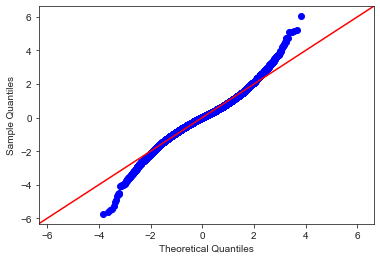

In [53]:
model_resid = model.resid
fig = sm.graphics.qqplot(model_resid, dist=stats.norm, line='45', fit=True)

The log tranform really helps with normality. In our case we still have some abnormality at high and low price values, but especially within quantiles -2 through 2 our data is looking pretty good.

Future models might look at breaking out predictions for high and low values and removing those factors from the model. In this case I think it's better to keep our outlier elmination to only removing 1% of data.

## Homoscedasticity Check

We are looking to see if there are any obvious patterns to where our errors occur. A generally shapeless blob is the goal here.

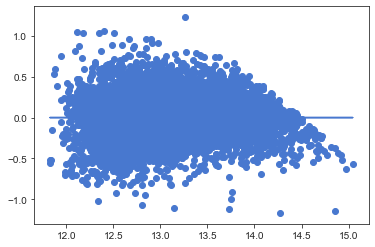

In [54]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

Good news, it looks like there might be some funneling toward the higher prices, but there is no strong hetroscedasticity.

In [55]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=test).fit()
print(formula)
model.summary()

price~sqft_living+floors+waterfront+condition+grade+sqft_above+renovated+lat+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98056+zipcode_98058+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98117+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98126+zipcode_98133+zipcode_98144+zipcode_98146+zipcode_98155+zipcode_98168+zipcode_98177+zipcode_98199


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     445.5
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:45:31   Log-Likelihood:                 827.66
No. Observations:                5345   AIC:                            -1537.
Df Residuals:                    5286   BIC:                            -1149.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.0604      0.006   2114.227      0.000      13.048      13.073
sqft_living       0.1869      0.007     27.232      0.000       0.173       0.200
floors           -0.0092      0.004     -2.360      0.018      -0.017      -0.002
waterfront        0.0534      0.003     17.396      0.000       0.047       0.059
condition         0.0508      0.003     16.183      0.000       0.045       0.057
grade             0.1363      0.005     26.936      0.000       0.126       0.146
sqft_above        0.0368      0.007      4.921      0.000       0.022       0.051
renovated         0.0236      0.003      8.290      0.000       0.018       0.029
lat               0.2575      0.006     43.305      0.000       0.246       0.269
zipcode_98004     0.5018      0.028     17.895      0.000       0.447       0.557
zipcode_98005     0.1222      0.031      3.906      0.000       0.061       0.184
zipcode_98006     0.1639      0.021      7.892      0.000       0.123       0.205
zipcode_98007     0.0427      0.032      1.320      0.187      -0.021       0.106
zipcode_98008     0.0745      0.025      3.029      0.002       0.026       0.123
zipcode_98010     0.1383      0.045      3.044      0.002       0.049       0.227
zipcode_98011    -0.3699      0.034    -11.029      0.000      -0.436      -0.304
zipcode_98014    -0.3488      0.041     -8.602      0.000      -0.428      -0.269
zipcode_98019    -0.4290      0.031    -13.720      0.000      -0.490      -0.368
zipcode_98022     0.2632      0.031      8.517      0.000       0.203       0.324
zipcode_98023    -0.0480      0.021     -2.280      0.023      -0.089      -0.007
zipcode_98027     0.1240      0.023      5.498      0.000       0.080       0.168
zipcode_98028    -0.3948      0.028    -14.068      0.000      -0.450      -0.340
zipcode_98029     0.0884      0.025      3.511      0.000       0.039       0.138
zipcode_98030    -0.0640      0.027     -2.407      0.016      -0.116      -0.012
zipcode_98031    -0.1181      0.023     -5.121      0.000      -0.163      -0.073
zipcode_98032    -0.1930      0.039     -4.974      0.000      -0.269      -0.117
zipcode_98033     0.0654      0.023      2.865      0.004       0.021       0.110
zipcode_98034    -0.2536      0.021    -12.009      0.000      -0.295      -0.212
zipcode_98039     0.7082      0.074      9.529      0.000       0.563       0.854
zipcode_98040     0.3522      0.028     12.806      0.000       0.298       0.406
zipcode_98042    -0.0389      0.020     -1.914      0.056      -0.079       0.001
zipcode_98045     0.0312      0.027      1.163      0.245      -0.021       0.084
zipcode_98056    -0.0867      0.022     -3.955      0.000      -0.130      -0.044
zipcode_98058    -0.0959      0.021     -4.644      0.000      -0.136      -0.055
zipcode_98072    -0.3377      0.029    -11.508   

## Cross-Validation (ish)

Let's try using our model that we trained on the train data and use the test data instead. Idealy, we will have very similar R2 scores. Note: we don't really want to see higher R2 scores with the test, since that would imply there is something non-replicable with our model.

In [56]:
r2_train = r2_score(train['price'],model.predict(train))
print(f'Training Data R-Squared = {round(r2_train,3)}')


r2_test = r2_score(test['price'],model.predict(test))
print(f'Test Data R-Squared = {round(r2_test,3)}')


Training Data R-Squared = 0.831
Test Data R-Squared = 0.83


Our test data R2 was very similar to the train data R2, so it looks like a success.

Now that we have a model that we are comfortable with, it is time to analyse our results in order to make useful recommendations to stakeholders.

# Analysis

We have a model that accounts for around 82% of housing price fluctuations using our selected features. But what are those features and how can we make useful insights for stakeholders with them? Let's go back to our 3 central questions.

##  What are the most salient features of a house that can be changed in order to impact sale price?

Let's take the features that became our predicitive linear formula and sort them by how much each feature impacts the final model. 

In [57]:
model.params.sort_values()

zipcode_98019    -0.429014
zipcode_98155    -0.419019
zipcode_98028    -0.394816
zipcode_98077    -0.377339
zipcode_98133    -0.377066
zipcode_98011    -0.369913
zipcode_98014    -0.348757
zipcode_98072    -0.337681
zipcode_98168    -0.281555
zipcode_98034    -0.253610
zipcode_98177    -0.251817
zipcode_98125    -0.230669
zipcode_98032    -0.192989
zipcode_98108    -0.159934
zipcode_98031    -0.118100
zipcode_98106    -0.104663
zipcode_98058    -0.095902
zipcode_98146    -0.093646
zipcode_98056    -0.086730
zipcode_98030    -0.064032
zipcode_98023    -0.047971
zipcode_98074    -0.040350
zipcode_98042    -0.038883
floors           -0.009232
renovated         0.023649
zipcode_98045     0.031240
zipcode_98075     0.035025
sqft_above        0.036766
zipcode_98007     0.042720
condition         0.050840
waterfront        0.053411
zipcode_98092     0.056365
zipcode_98103     0.060737
zipcode_98033     0.065412
zipcode_98117     0.069186
zipcode_98008     0.074457
zipcode_98126     0.076072
z

This can seem inscrutable, but we know that all features related to zipcode are not something our home owners can change, latitude is similarly immutable. So that makes sqft_living the most significant, changeable, feature of our home price model, followed by grade and condition.

These are very useful insights because they are a good combination of expected (square footage increases lead to an increase in home price) and less expected (2 subjective rating categories).

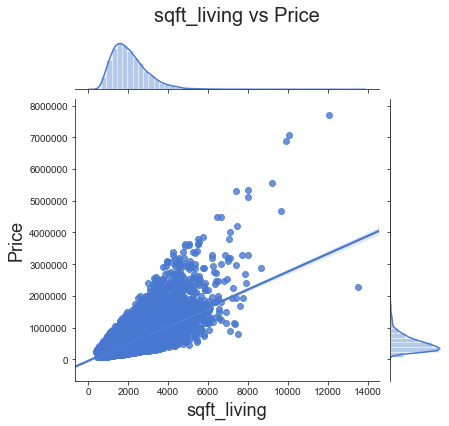

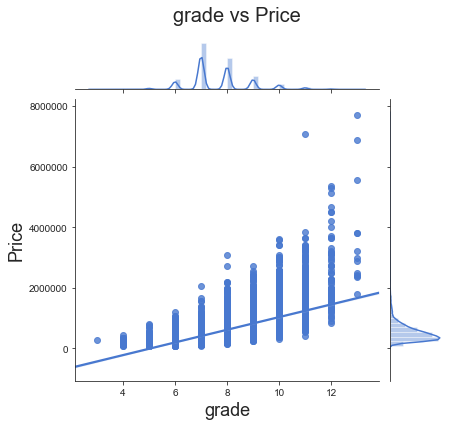

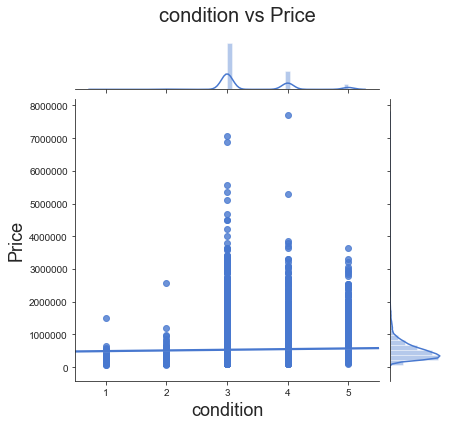

In [56]:
mutable_cols = ['sqft_living','grade', 'condition']

for col in mutable_cols:
    plt.rcParams["axes.labelsize"] = 18
    sns.jointplot(x = col, y = 'price', data = data_not_normal, kind = 'reg')
    plt.ylabel('Price', fontsize=18)
    plt.subplots_adjust(top=0.9)
    plt.suptitle(col + ' vs Price', fontsize=20)
    plt.show()

The grade feature is very interesting as it is a grade given by the King's County Grading system, and could conceivibly be changed as the house is improved by a home owner. Condition is similar in that it is a subjective rating system. For both of these options, the stakeholder knows that home improvements that would change the condition of the home or how it would be graded could significantly impact price. 

##  Which immutable features of the house (location, year built) will most drastically impact sale price?

As we saw when sorting our parameters, features related to location were extrememely important. Specifically the zipcodes:98039 and 98004 were strongly correllated with higher property values while 98019 and 98133 were correllated with the lower property values.

Latitude and Waterfront properties were also correllated with higher property values.

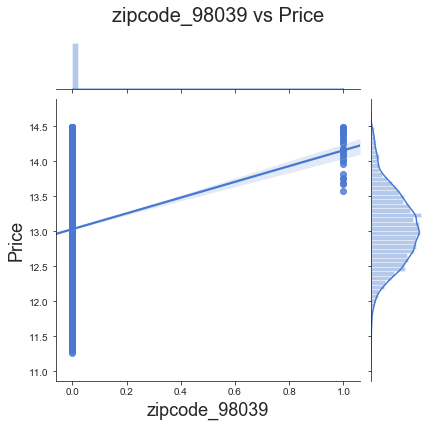

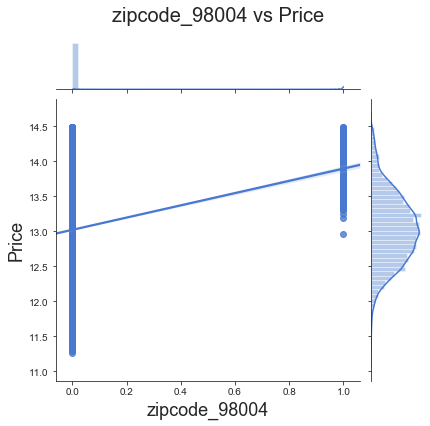

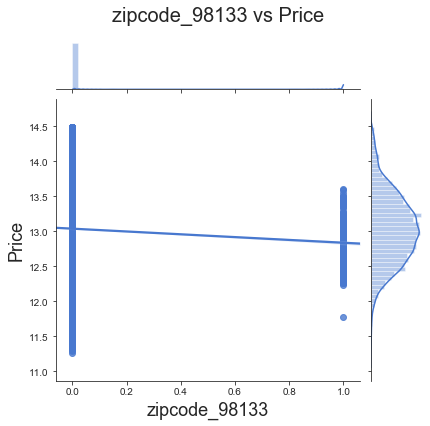

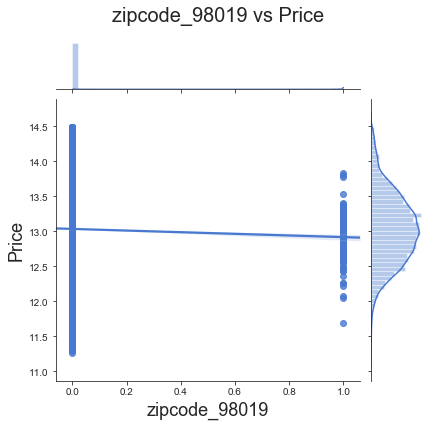

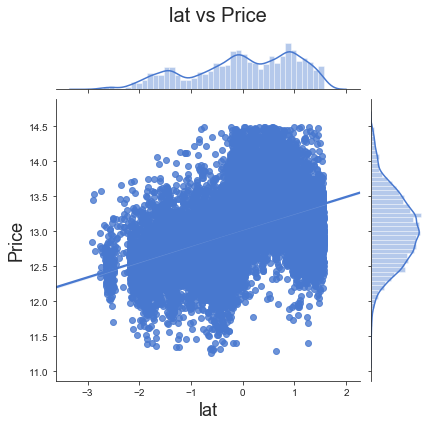

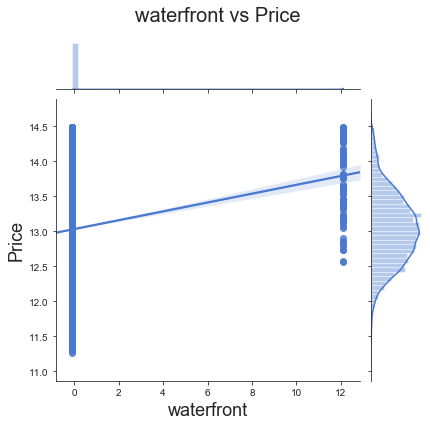

In [69]:
immutable_cols = ['zipcode_98039','zipcode_98004', 'zipcode_98133', 'zipcode_98019', 'lat', 'waterfront']
for col in immutable_cols:
    plt.rcParams["axes.labelsize"] = 18
    sns.jointplot(x = col, y = 'price', data = data, kind = 'reg')
    plt.ylabel('Price', fontsize=18)
    plt.subplots_adjust(top=0.9)
    plt.suptitle(col + ' vs Price', fontsize=20)
    plt.show()

While our stakeholders can't change these facets of their property, they can be aware that these immutable features are going to play a role in their home sale price and will help explain whether they should attempt to sell for a premium if they are in a preferred zipcode or accept less if they live in a non-preferred zipcode.

## Will investment in the aspects of the house that are changible be cost effective?

In [66]:
data_not_normal = data_not_normal.zipcode.astype('category')

The good news for this section is that those features of the model that can be changed offer a wide variety of options. 

While it is somewhat common knowledge, adding squarefootage is the most direct feature that can impact sale price. According to our model an increase of 1 standard deviation of square footage (918 sqft) will result in a 18% increase in property value.  For a 500000 dollar house this would be a $9000 increase in value.

The Condition and Grade features are harder to exactly quantify because they rely on a subjective rating, but the King's County website explains that the grade feature looks into quality of construction, quality of materials and overall workmanship on the house. Combining this with what we know about square footage, it is more worthwhile to have high quality expansion work done because this would see an increase to all 3 important features instead of just one.

# Conclusion

We have created a model that does a good job of predicting home prices given a sample set of data and features. For our stakeholders, the model is able to recommed features that can be changed in a home to increase value (SqFt living, Grade, Condition) while also identifying that there is no magic bullet as property values a still significantly impacted by unchangable aspects of the property. High value zipcodes, position and waterfront property still command higher prices.

These recommendations would be even more significant for a stakeholder looking to buy a house, or an investor trying to invest in multiple properties. However, for the given stakeholders there are still actionable items like adding square footage, using quality workers and materials as well as simply knowing the value of the location that they are selling from in order to accurately price their house for the market.

# Future Steps

In the future it would be great to look more specifically at certain price categories of houses to see if certain features are more important to expensive or cheap houses. I would imagine a more accurate model could be made for categorized housing prices, and for sellers it would be advantageous to fit a model to their specific price range instead of all houses sold (overfitting might be more of problem if using this strategy). 